In [904]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.axis import Axis
import datetime as dt

import time
start = time.time()

In [905]:
def get_data2(filename):    
    data = pd.read_csv(filename) #, names=["Interval","kWh"])
    return data

In [906]:
def conso_byhour(day):
    ''' 
    display conso by hour for the chosen day
    '''
    conso_day=conso_data[conso_data['days']==day].copy()  # no more error
    conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))

    conso_hours = conso_day.copy()
    conso_hours['hours']= conso_hours['dates'].dt.strftime('%H')
    conso_hours#.info()
    # group by hour
    groupedbyhour = conso_hours[['hours','kWh']].groupby('hours', sort=False)
    groupedbyhour.count()
    len(groupedbyhour)
    x = np.arange(1,len(groupedbyhour)+1)

    #groupedbyhour.count().plot(grid=True,xticks=x)
    plt.figure(figsize=(12, 8),facecolor='darkcyan')
    values = groupedbyhour.count().kWh
    #ax = plt.bar(x,groupedbyhour.count().kWh)
    ax = values.plot(kind="bar",color='green',width=.8)
    ax.set_facecolor('antiquewhite')
    #plt.grid()
    plt.tight_layout()
    plt.title(f'Conso by hour (W) - {day}')
    plt.xlim(-1,len(x)+1)
    plt.xticks(rotation=30);
    
    rects = ax.patches

    # Make some labels.
    labels = [f"{i}" for i in values]
    
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom",
            fontfamily='calibri', fontsize=16, fontweight='bold', color='blue'
        )
    
    
def from_csv(csv_file): 
    ''' save data to csv  '''
    df = pd.read_csv(csv_file)
    return df
    
def to_csv(csv_file, df):
    ''' read data from csv'''
    df.to_csv(csv_file, index=False)

def period(p=1):
    ''' 
    give the time of conso for a 1kWh window in a day
    p =  ordinal window ex: p=1 first kWh, p=2 second kWh ..
    df is the data from midnight, each entry is 1 watt
    as the length of df is the total conso in watt,
    we have len(df)/1000 = number of windows of 1 KWh since midnight
    the last window may not be 1000 watt long !
    '''
    if p==1:
        start = df.iloc[0].dates
    else:
        start = df.iloc[(p-1)*1000-1].dates
    if len(df)>p*1000:
        end = df.iloc[p*1000-1].dates
        conso = p*1000
    else:
        end = df.iloc[len(df)-1].dates
        conso = len(df) - (p-1)*1000
    period = end - start  # type timedelta
    hours = int(period / dt.timedelta(hours=1))
    mins = int(period / dt.timedelta(minutes=1)) - hours*60
    secs = int(period / dt.timedelta(seconds=1)) - hours*3600 - mins*60

    #df.iloc[1001:2000]['dates']#.tail(1)
    #print(period)
    print(f'{start}\t{end}\t{hours}h {mins}m {secs}s \t{conso}')


In [907]:
conso_file = r"\\192.168.0.175\pihome\Documents\conso2.csv"
conso_data = get_data2(conso_file)
conso_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581122 entries, 0 to 1581121
Data columns (total 2 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   Interval  1581122 non-null  int64  
 1   kWh       1581122 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 24.1 MB


In [908]:
conso_data['kWh']

0          0.16
1          0.16
2          0.16
3          0.16
4          0.16
           ... 
1581117    0.14
1581118    0.14
1581119    0.14
1581120    0.14
1581121    0.13
Name: kWh, Length: 1581122, dtype: float64

In [909]:
conso_data['kWh']

0          0.16
1          0.16
2          0.16
3          0.16
4          0.16
           ... 
1581117    0.14
1581118    0.14
1581119    0.14
1581120    0.14
1581121    0.13
Name: kWh, Length: 1581122, dtype: float64

In [910]:
l=len(conso_data)-1
l

1581121

In [911]:
conso_data['sec']=conso_data['Interval']/1000


In [912]:
conso_data['Wh']=3600000/conso_data['Interval']


In [913]:
conso_data['cumul(ms)']=conso_data['Interval'].cumsum(axis=0)

In [914]:
conso_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581122 entries, 0 to 1581121
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   Interval   1581122 non-null  int64  
 1   kWh        1581122 non-null  float64
 2   sec        1581122 non-null  float64
 3   Wh         1581122 non-null  float64
 4   cumul(ms)  1581122 non-null  int64  
dtypes: float64(3), int64(2)
memory usage: 60.3 MB


In [915]:
conso_data.tail()

,Interval,kWh,sec,Wh,cumul(ms)
1581117,26424,0.14,26.424,136.239782,39142108750
1581118,26273,0.14,26.273,137.022799,39142135023
1581119,26373,0.14,26.373,136.503242,39142161396
1581120,26586,0.14,26.586,135.409614,39142187982
1581121,26999,0.13,26.999,133.338272,39142214981


In [916]:
cumtime= int(conso_data._get_value(l,'cumul(ms)')*1000)  # convert to microseconds
cumtime

39142214981000

In [917]:
from datetime import datetime, timedelta
now = datetime.now()
# conso.csv dynamique
base = now - timedelta(microseconds=cumtime)
base  # date de début

datetime.datetime(2023, 8, 21, 18, 58, 16, 520924)

In [918]:
conso_data['cumul(ms)'][conso_data['cumul(ms)'].isna()==True]

Series([], Name: cumul(ms), dtype: int64)

In [919]:
conso_data.iloc[0]


Interval     21934.00000
kWh              0.16000
sec             21.93400
Wh             164.12875
cumul(ms)    21934.00000
Name: 0, dtype: float64

# Recréer les dates à partir des cumuls par impulsion


In [920]:
conso_data['dates'] = [base + dt.timedelta(microseconds=t*1000) for t in conso_data['cumul(ms)']]



In [921]:
conso_data['dates']

0         2023-08-21 18:58:38.454924
1         2023-08-21 18:59:00.312924
2         2023-08-21 18:59:22.313924
3         2023-08-21 18:59:44.241924
4         2023-08-21 19:00:06.132924
                     ...            
1581117   2024-11-16 19:46:45.270924
1581118   2024-11-16 19:47:11.543924
1581119   2024-11-16 19:47:37.916924
1581120   2024-11-16 19:48:04.502924
1581121   2024-11-16 19:48:31.501924
Name: dates, Length: 1581122, dtype: datetime64[ns]

## créer les dates

In [922]:
conso_data['days']= [d.strftime('%d/%m/%y') for d in conso_data['dates']]    
#[str(d.month)+'-'+str(d.day) for d in conso_data['dates']]
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,21934,0.16,21.934,164.128750,21934,2023-08-21 18:58:38.454924,21/08/23
1,21858,0.16,21.858,164.699424,43792,2023-08-21 18:59:00.312924,21/08/23
2,22001,0.16,22.001,163.628926,65793,2023-08-21 18:59:22.313924,21/08/23
3,21928,0.16,21.928,164.173659,87721,2023-08-21 18:59:44.241924,21/08/23
4,21891,0.16,21.891,164.451144,109612,2023-08-21 19:00:06.132924,21/08/23
...,...,...,...,...,...,...,...
1581117,26424,0.14,26.424,136.239782,39142108750,2024-11-16 19:46:45.270924,16/11/24
1581118,26273,0.14,26.273,137.022799,39142135023,2024-11-16 19:47:11.543924,16/11/24
1581119,26373,0.14,26.373,136.503242,39142161396,2024-11-16 19:47:37.916924,16/11/24
1581120,26586,0.14,26.586,135.409614,39142187982,2024-11-16 19:48:04.502924,16/11/24


### save conso_data with dates

In [923]:
#to_csv(r'../conso_data_with_dates.csv',conso_data)

# tranche journalière


In [924]:
now = datetime.now()
month = now.month
year = now.year
date = now.day
today = now.strftime('%d/%m/%y')    #str(now.month)+'-'+str(now.day)
today, date, month, year


('16/11/24', 16, 11, 2024)

In [925]:
here = now.strftime('%H:%M:%S')
here

'19:49:07'

In [926]:
conso_day = conso_data[conso_data['days']==today]
# save to file
filename='conso_jour.csv'
conso_day.to_csv(filename)
filename='../conso_jour.csv'
conso_day.to_csv(filename)

In [927]:
conso_day.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2771 entries, 1578351 to 1581121
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   2771 non-null   int64         
 1   kWh        2771 non-null   float64       
 2   sec        2771 non-null   float64       
 3   Wh         2771 non-null   float64       
 4   cumul(ms)  2771 non-null   int64         
 5   dates      2771 non-null   datetime64[ns]
 6   days       2771 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 173.2+ KB


In [928]:
# group by day
grouped = conso_data[['days','kWh']].groupby('days', sort=False)
'''conso_graph=[]
for name, group in grouped:
    if name=='01/04/2024':print(group)
    #print("\n", name, len(group)/1000)
    conso_graph.append((name,len(group)/1000))'''
#grouped
# count elements in each group => conso in watts => convert to kW
df_grp = grouped.count()/1000



In [929]:
data = list(df_grp['kWh'])
print(data)

[0.849, 3.7, 4.23, 3.686, 4.191, 4.617, 3.512, 3.404, 3.524, 3.689, 3.793, 3.766, 4.257, 3.821, 3.448, 3.64, 3.324, 3.375, 4.304, 3.999, 4.05, 3.921, 3.438, 4.469, 3.723, 3.762, 4.406, 4.668, 3.786, 3.215, 3.18, 4.014, 3.658, 3.177, 3.794, 4.17, 3.74, 3.566, 4.787, 4.177, 4.551, 3.77, 3.4, 4.31, 3.873, 3.873, 3.431, 4.081, 3.653, 3.399, 4.13, 3.384, 3.892, 3.835, 3.643, 3.749, 4.242, 3.3, 3.872, 2.972, 2.055, 2.047, 2.457, 4.09, 3.726, 4.331, 3.627, 3.905, 3.748, 3.934, 3.968, 4.123, 3.635, 3.162, 3.803, 3.508, 3.631, 3.704, 3.687, 3.234, 3.912, 3.26, 3.748, 3.597, 4.087, 3.607, 3.341, 3.825, 4.06, 4.384, 4.081, 3.998, 4.226, 3.749, 3.923, 3.868, 3.913, 3.748, 4.039, 4.345, 3.887, 3.504, 3.682, 3.674, 3.341, 3.849, 3.992, 4.106, 3.475, 4.172, 3.609, 4.096, 4.519, 3.684, 3.427, 3.575, 4.178, 3.68, 4.081, 3.982, 3.743, 3.593, 5.131, 3.696, 3.765, 4.3, 4.094, 4.745, 4.39, 3.971, 3.788, 4.362, 4.672, 4.207, 4.784, 4.332, 3.701, 4.201, 3.697, 3.628, 3.524, 3.958, 3.662, 3.787, 3.582, 3.494,

In [930]:
# save to file
import pickle
path = r'kwh_mean.pkl'
with open(path,'wb') as file:
    pickle.dump(data, file)

In [931]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
def show(day,pltcolor='darkcyan',bgcolor="ivory"):
    conso_day=conso_data[conso_data['days']==day].copy()  # no more error
    conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
    #=[x.hour for x in conso_day['dates']]
    df = conso_day.set_index('heure')
    here = now.strftime('%H:%M:%S')
    conso_jour=len(df['kWh'])
    here, len(df)/1000, conso_jour

    # consommation d'une journée entière à partir de minuit
    # Set background color of the outer 
    # area of the plt
    #plt.figure(facecolor=fgcolor)
    fig, ax = plt.subplots(facecolor=pltcolor)
    
    major_ticks=300;minor_ticks=100
    ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # major ticks tous les 15 min
    ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))
    # the size of A4 paper
    fig.set_size_inches(10, 5)
    
    # set bg color
    ax.set_facecolor(bgcolor)
    plt.plot(df['kWh'])
    #plt.plot(conso_day['heure'],conso_day['kWh'])
    plt.title(f'Journée du {day} {here} : {conso_jour/1000} kwh')
    plt.grid()
    plt.xticks(rotation=30);


In [932]:
df = conso_data
len(df)

1581122

In [933]:
period(p=2)

2023-08-22 01:04:52.257924	2023-08-22 08:09:07.877924	7h 4m 15s 	2000


In [934]:
# mean of all instant conso
total_mean = conso_data[['kWh']].mean()
total_mean

kWh    0.291729
dtype: float64

In [935]:
mean=(grouped.count()/1000).mean()
mean

kWh    3.482648
dtype: float64

In [936]:
last=df_grp.iloc[-1]['kWh']
last

2.771

In [937]:
conso_day.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2771 entries, 1578351 to 1581121
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   2771 non-null   int64         
 1   kWh        2771 non-null   float64       
 2   sec        2771 non-null   float64       
 3   Wh         2771 non-null   float64       
 4   cumul(ms)  2771 non-null   int64         
 5   dates      2771 non-null   datetime64[ns]
 6   days       2771 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 173.2+ KB


In [938]:
# select day
day = today
#day = '16/08/24'


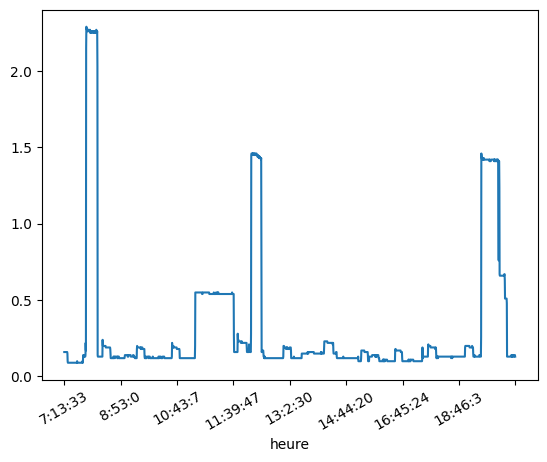

In [939]:
conso_day=conso_data[conso_data['days']==day].copy()  # no more error
conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
#=[x.hour for x in conso_day['dates']]
df= conso_day.set_index('heure')
df.tail(2000)['kWh'].plot()
plt.xticks(rotation=30);
#conso_day['heure']


In [940]:
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,21934,0.16,21.934,164.128750,21934,2023-08-21 18:58:38.454924,21/08/23
1,21858,0.16,21.858,164.699424,43792,2023-08-21 18:59:00.312924,21/08/23
2,22001,0.16,22.001,163.628926,65793,2023-08-21 18:59:22.313924,21/08/23
3,21928,0.16,21.928,164.173659,87721,2023-08-21 18:59:44.241924,21/08/23
4,21891,0.16,21.891,164.451144,109612,2023-08-21 19:00:06.132924,21/08/23
...,...,...,...,...,...,...,...
1581117,26424,0.14,26.424,136.239782,39142108750,2024-11-16 19:46:45.270924,16/11/24
1581118,26273,0.14,26.273,137.022799,39142135023,2024-11-16 19:47:11.543924,16/11/24
1581119,26373,0.14,26.373,136.503242,39142161396,2024-11-16 19:47:37.916924,16/11/24
1581120,26586,0.14,26.586,135.409614,39142187982,2024-11-16 19:48:04.502924,16/11/24


In [941]:
df

,Interval,kWh,sec,Wh,cumul(ms),dates,days
heure,,,,,,,
0:0:19,28822,0.12,28.822,124.904587,39070922506,2024-11-16 00:00:19.026924,16/11/24
0:0:48,29127,0.12,29.127,123.596663,39070951633,2024-11-16 00:00:48.153924,16/11/24
0:1:17,29129,0.12,29.129,123.588177,39070980762,2024-11-16 00:01:17.282924,16/11/24
0:1:46,28970,0.12,28.970,124.266483,39071009732,2024-11-16 00:01:46.252924,16/11/24
0:2:13,26818,0.13,26.818,134.238198,39071036550,2024-11-16 00:02:13.070924,16/11/24
...,...,...,...,...,...,...,...
19:46:45,26424,0.14,26.424,136.239782,39142108750,2024-11-16 19:46:45.270924,16/11/24
19:47:11,26273,0.14,26.273,137.022799,39142135023,2024-11-16 19:47:11.543924,16/11/24
19:47:37,26373,0.14,26.373,136.503242,39142161396,2024-11-16 19:47:37.916924,16/11/24


In [942]:
# group by hour, df  = data of a chosen day
df_byhour = df[['days','kWh']].groupby('heure', sort=False)
kwh_byhour = df_byhour['kWh']



Max : 02/11/24 4.085
Min : 19/10/24 1.795


,Interval,kWh,sec,Wh,cumul(ms),dates,days,heure
1578351,28822,0.12,28.822,124.904587,39070922506,2024-11-16 00:00:19.026924,16/11/24,0:0:19
1578352,29127,0.12,29.127,123.596663,39070951633,2024-11-16 00:00:48.153924,16/11/24,0:0:48
1578353,29129,0.12,29.129,123.588177,39070980762,2024-11-16 00:01:17.282924,16/11/24,0:1:17
1578354,28970,0.12,28.970,124.266483,39071009732,2024-11-16 00:01:46.252924,16/11/24,0:1:46
1578355,26818,0.13,26.818,134.238198,39071036550,2024-11-16 00:02:13.070924,16/11/24,0:2:13
...,...,...,...,...,...,...,...,...
1581117,26424,0.14,26.424,136.239782,39142108750,2024-11-16 19:46:45.270924,16/11/24,19:46:45
1581118,26273,0.14,26.273,137.022799,39142135023,2024-11-16 19:47:11.543924,16/11/24,19:47:11
1581119,26373,0.14,26.373,136.503242,39142161396,2024-11-16 19:47:37.916924,16/11/24,19:47:37
1581120,26586,0.14,26.586,135.409614,39142187982,2024-11-16 19:48:04.502924,16/11/24,19:48:4


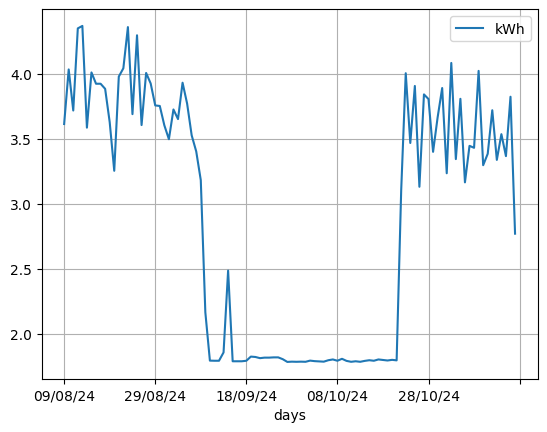

In [943]:

# premier kWh
if len(df)>1000:
    df.iloc[1000]['dates']
df.iloc[0].dates
df.dates.dt.time

# save data
df_grp.to_csv('df_grp.csv')
df.to_csv('df.csv')
df_grp.to_csv('conso_day_from_20230821.csv')

#df.info()
#df_grp.info()
df_grp.mean()
#df_grp.head()
df_grp.tail(14)
df_grp.tail(100).mean()
df_grp.tail(100).plot()
plt.grid()
# max min during last month
#print(df_grp.iloc[-31:-1])
df_grp.iloc[-31:-1].describe()

month = df_grp.iloc[-31:-1]['kWh']
print('Max :',month.idxmax(), max(month))
print('Min :',month.idxmin(), min(month))
conso_day


2024-11-16 00:00:19.026924	2024-11-16 08:42:28.440924	8h 42m 9s 	1000
2024-11-16 08:42:28.440924	2024-11-16 14:33:32.982924	5h 51m 4s 	2000
2024-11-16 14:33:32.982924	2024-11-16 19:48:31.501924	5h 14m 58s 	771
<class 'pandas.core.frame.DataFrame'>
Index: 2771 entries, 1578351 to 1581121
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   2771 non-null   int64         
 1   kWh        2771 non-null   float64       
 2   sec        2771 non-null   float64       
 3   Wh         2771 non-null   float64       
 4   cumul(ms)  2771 non-null   int64         
 5   dates      2771 non-null   datetime64[ns]
 6   days       2771 non-null   object        
 7   heure      2771 non-null   object        
 8   hours      2771 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 216.5+ KB


('16/11/24', <Axes: xlabel='hours'>)

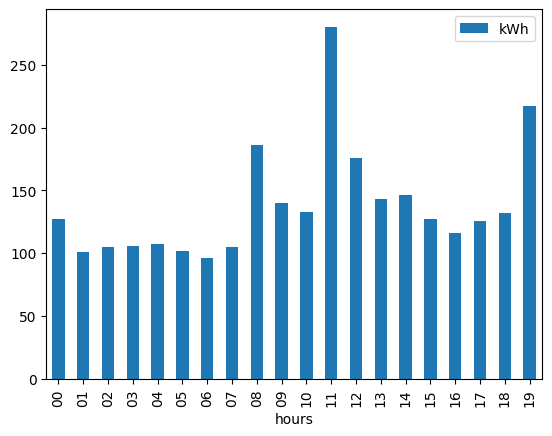

In [944]:

tranches = len(df)//1000
tranches+1
# temps de conso par tranches de 1kwh
for p in range(1,tranches+2):  # les 5 tranches de kWh consommés
    if len(df)>(p-1)*1000:
        period(p)
# conso temps réel
here = now.strftime('%H:%M:%S')
conso_jour=len(df['kWh'])
here, len(df)/1000, conso_jour
#add hours column for a chosen day
conso_hours = conso_day.copy()
conso_hours['hours']= conso_hours['dates'].dt.strftime('%H')
conso_hours.info()

conso_hours
# group conso of the day by hour
groupedbyhour = conso_hours[['hours','kWh']].groupby('hours', sort=False)
list(groupedbyhour)
day, groupedbyhour.count().plot.bar()

In [945]:
df_grp

,kWh
days,
21/08/23,0.849
22/08/23,3.700
23/08/23,4.230
24/08/23,3.686
25/08/23,4.191
...,...
12/11/24,3.339
13/11/24,3.537
14/11/24,3.368


In [946]:
# select number of days to display
span = 30
#df_grp.tail(span)


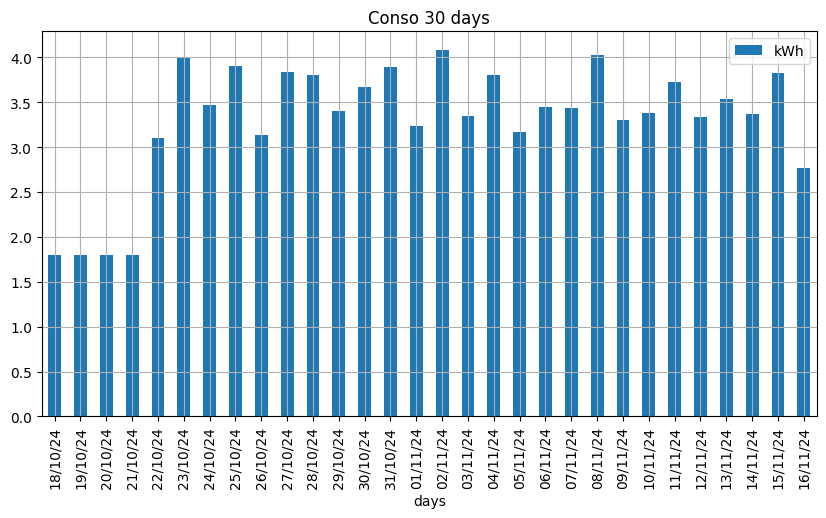

In [947]:

# Plot the figure without labels
df_grp.tail(span).plot.bar(grid=True, figsize=(10, 5), layout='tight') 
plt.title(f'Conso {span} days')
plt.xticks(rotation=90);


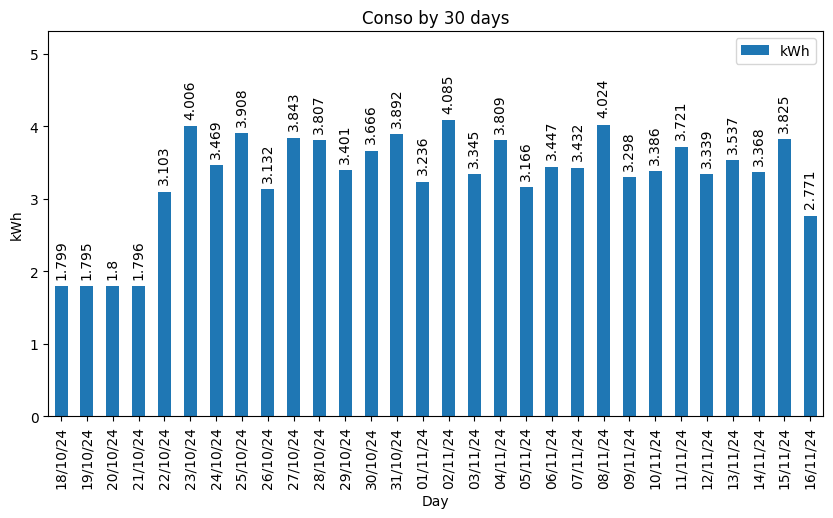

In [948]:
# Plot the figure with labels.
x_labels = list(df_grp.tail(span)['kWh'])
#x_labels
#fig, ax = plt.subplots(figsize=(2, 2), facecolor='lightskyblue',layout='constrained')
ax = df_grp.tail(span).plot(kind="bar", figsize=(10, 5), layout='tight')
ax.set_title(f"Conso by {span} days")
ax.set_xlabel("Day")
ax.set_ylabel("kWh")
ax.set_ymargin(0.3)
#ax.set_xticklabels(x_labels)
#fig.tight_layout()

rects = ax.patches

# Make some labels.
labels = [x_labels[i] for i in range(len(x_labels))]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    #print(height)
    ax.text(
        rect.get_x() + rect.get_width() / 2, height+.1, label, ha="center", va="bottom", rotation=90
    )

#plt.show()

In [949]:
y_labels = df_grp.tail(span)['kWh']
y_labels

days
18/10/24    1.799
19/10/24    1.795
20/10/24    1.800
21/10/24    1.796
22/10/24    3.103
23/10/24    4.006
24/10/24    3.469
25/10/24    3.908
26/10/24    3.132
27/10/24    3.843
28/10/24    3.807
29/10/24    3.401
30/10/24    3.666
31/10/24    3.892
01/11/24    3.236
02/11/24    4.085
03/11/24    3.345
04/11/24    3.809
05/11/24    3.166
06/11/24    3.447
07/11/24    3.432
08/11/24    4.024
09/11/24    3.298
10/11/24    3.386
11/11/24    3.721
12/11/24    3.339
13/11/24    3.537
14/11/24    3.368
15/11/24    3.825
16/11/24    2.771
Name: kWh, dtype: float64

In [950]:
x_labels=df_grp.tail(span).index
x_labels

Index(['18/10/24', '19/10/24', '20/10/24', '21/10/24', '22/10/24', '23/10/24',
       '24/10/24', '25/10/24', '26/10/24', '27/10/24', '28/10/24', '29/10/24',
       '30/10/24', '31/10/24', '01/11/24', '02/11/24', '03/11/24', '04/11/24',
       '05/11/24', '06/11/24', '07/11/24', '08/11/24', '09/11/24', '10/11/24',
       '11/11/24', '12/11/24', '13/11/24', '14/11/24', '15/11/24', '16/11/24'],
      dtype='object', name='days')

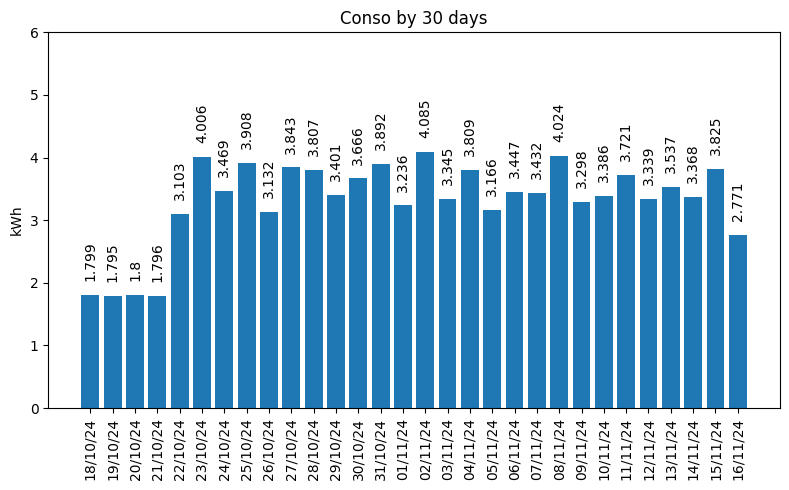

In [951]:
# Plot the figure with labels
# using bar_label
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_label_demo.html#sphx-glr-gallery-lines-bars-and-markers-bar-label-demo-py
fig, ax = plt.subplots(figsize=(8, 5), layout='tight')
bar_container = ax.bar(x_labels, y_labels)
#ax.set_xticks(x_labels, rotation=45)
ax.bar_label(bar_container, rotation=90, padding=10) #, fmt='{:,.0f}')
ax.set(ylabel='kWh', title=f'Conso by {span} days', ylim=(0, 6))
plt.xticks(rotation=90);


In [952]:
# figure manager

current=plt.get_current_fig_manager()
current.set_window_title('Conso by day')
#help(current.canvas)
#,facecolor='darkcyan')
#plt.style.use('fivethirtyeight')
#plt.style.use('ggplot')
#plt.style.use('dark_background')


<Figure size 640x480 with 0 Axes>

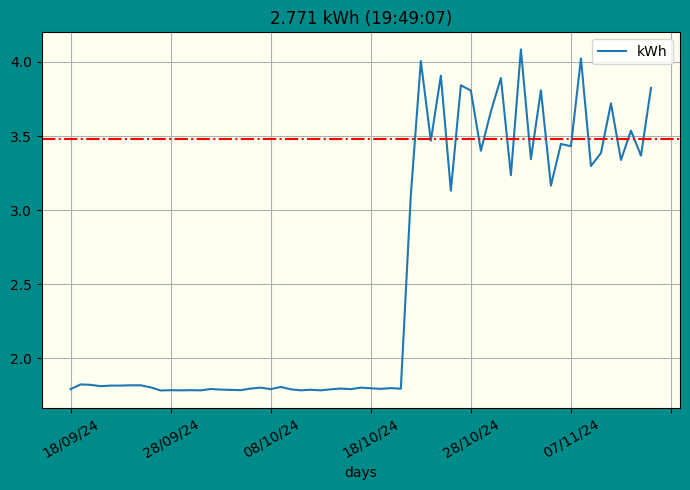

In [953]:
# pandas plot the day consos in the group
fig, ax = plt.subplots(facecolor='darkcyan', figsize=(7, 5), layout='tight')  # as argument
#or fig.patch.set_facecolor('darkcyan') # This changes the grey to white
ax.set_facecolor("ivory")

# 2 last months
df_grp.iloc[-60:-1].plot(grid=True,ax=ax, y=["kWh"])   #df.plot(x="Name", y=["Age", "Height(in cm)"], kind="bar", ax=ax)
plt.title(str(last)+' kWh ('+str(here)+')')
plt.axhline(y=np.nanmean(df_grp),c='red', ls='-.')
plt.xticks(rotation=30);  # https://ipython.readthedocs.io/en/stable/interactive/tips.html


Text(0.5, 1.0, 'Variations journalières')

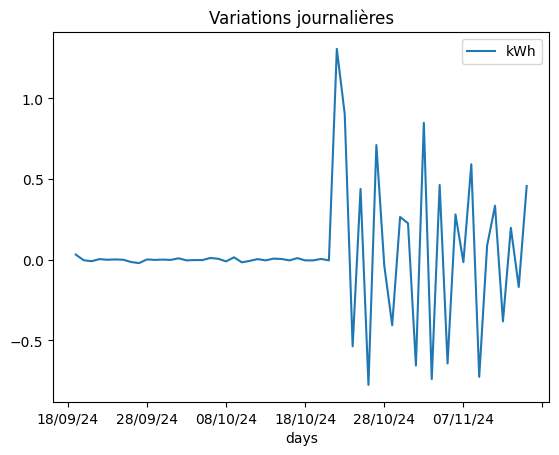

In [954]:
# variations journalières
df_grp.iloc[-60:-1].diff().plot()
plt.title('Variations journalières')

# Data from 21/08/23

In [955]:
# add hours column for conso_data (from 21/08/2023)
conso_days = conso_data.copy()
conso_days['hours']= conso_days['dates'].dt.strftime('%H')
conso_days

,Interval,kWh,sec,Wh,cumul(ms),dates,days,hours
0,21934,0.16,21.934,164.128750,21934,2023-08-21 18:58:38.454924,21/08/23,18
1,21858,0.16,21.858,164.699424,43792,2023-08-21 18:59:00.312924,21/08/23,18
2,22001,0.16,22.001,163.628926,65793,2023-08-21 18:59:22.313924,21/08/23,18
3,21928,0.16,21.928,164.173659,87721,2023-08-21 18:59:44.241924,21/08/23,18
4,21891,0.16,21.891,164.451144,109612,2023-08-21 19:00:06.132924,21/08/23,19
...,...,...,...,...,...,...,...,...
1581117,26424,0.14,26.424,136.239782,39142108750,2024-11-16 19:46:45.270924,16/11/24,19
1581118,26273,0.14,26.273,137.022799,39142135023,2024-11-16 19:47:11.543924,16/11/24,19
1581119,26373,0.14,26.373,136.503242,39142161396,2024-11-16 19:47:37.916924,16/11/24,19
1581120,26586,0.14,26.586,135.409614,39142187982,2024-11-16 19:48:04.502924,16/11/24,19


In [956]:
# example groupby with apply
df = pd.DataFrame({'Animal': ['Falcon', 'Falcon',
                              'Parrot', 'Parrot'],
                   'Max Speed': [380., 370., 24., 26.]})
df.groupby("Animal", group_keys=True)[['Max Speed']].apply(lambda x: x)
      

Max Speed
Animal             
Falcon 0      380.0
       1      370.0
Parrot 2       24.0
       3       26.0

In [957]:
import pandas as pd
df = pd.read_csv(r'C:\Users\jean\Downloads\only-bh-extreme-events-satellite.csv'
                  ,index_col=[0,1,2,3,4]
                  ,header=[0,1,2,3]
                  ,skipinitialspace=True
                  #,tupleize_cols=True
                ) 

df.columns = pd.MultiIndex.from_tuples(df.columns)
df.index.names

FrozenList(['wsid', 'lat', 'lon', 'start', 'prcp_24'])

In [958]:
index=df.columns.levels[0]
index

Index(['al', 'asn', 'cc', 'chnk', 'ci', 'ciwc', 'clwc', 'd', 'd2m', 'hcc',
       'istl1', 'istl2', 'istl3', 'istl4', 'lcc', 'lsrh', 'mcc', 'msl', 'o3',
       'p53.162', 'p54.162', 'p55.162', 'p56.162', 'p57.162', 'p58.162',
       'p59.162', 'p60.162', 'p61.162', 'p62.162', 'p63.162', 'p64.162',
       'p65.162', 'p66.162', 'p67.162', 'p68.162', 'p69.162', 'p70.162',
       'p71.162', 'p72.162', 'p73.162', 'p74.162', 'p75.162', 'p76.162',
       'p77.162', 'p78.162', 'p79.162', 'p80.162', 'p81.162', 'p82.162',
       'p83.162', 'p84.162', 'p85.162', 'p86.162', 'p87.162', 'p88.162',
       'p89.162', 'p90.162', 'p91.162', 'p92.162', 'pv', 'q', 'r', 'rsn', 'sd',
       'skt', 'sp', 'sr', 'src', 'sst', 'stl1', 'stl2', 'stl3', 'stl4',
       'swvl1', 'swvl2', 'swvl3', 'swvl4', 't', 't2m', 'tcc', 'tco3', 'tcw',
       'tcwv', 'tsn', 'u', 'u10', 'v', 'v10', 'vo', 'w', 'z'],
      dtype='object')

In [959]:
df_des = pd.DataFrame(
                            index=df.columns.levels[0],
                            columns=['count','mean','std','min','25','50','75','max']
                         )
df_des

,count,mean,std,min,25,50,75,max
al,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
asn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
chnk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ci,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
v,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
v10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
w,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [960]:
groupallbyday = conso_days[['days','hours','kWh']].groupby(['days'], sort=False)
groupallbyday[['kWh']].count()  #.apply(lambda x: x))

,kWh
days,
21/08/23,849
22/08/23,3700
23/08/23,4230
24/08/23,3686
25/08/23,4191
...,...
12/11/24,3339
13/11/24,3537
14/11/24,3368


In [961]:
conso_days

,Interval,kWh,sec,Wh,cumul(ms),dates,days,hours
0,21934,0.16,21.934,164.128750,21934,2023-08-21 18:58:38.454924,21/08/23,18
1,21858,0.16,21.858,164.699424,43792,2023-08-21 18:59:00.312924,21/08/23,18
2,22001,0.16,22.001,163.628926,65793,2023-08-21 18:59:22.313924,21/08/23,18
3,21928,0.16,21.928,164.173659,87721,2023-08-21 18:59:44.241924,21/08/23,18
4,21891,0.16,21.891,164.451144,109612,2023-08-21 19:00:06.132924,21/08/23,19
...,...,...,...,...,...,...,...,...
1581117,26424,0.14,26.424,136.239782,39142108750,2024-11-16 19:46:45.270924,16/11/24,19
1581118,26273,0.14,26.273,137.022799,39142135023,2024-11-16 19:47:11.543924,16/11/24,19
1581119,26373,0.14,26.373,136.503242,39142161396,2024-11-16 19:47:37.916924,16/11/24,19
1581120,26586,0.14,26.586,135.409614,39142187982,2024-11-16 19:48:04.502924,16/11/24,19


In [962]:

# group all by day for all conso_days
groupallbydayhours = conso_days[['days','hours','kWh']].groupby(['days','hours'], sort=False)
# use apply to show the group
groupallbydayhours[['days','hours','kWh']].apply(lambda x: x)


days hours   kWh
days     hours                              
21/08/23 18    0        21/08/23    18  0.16
               1        21/08/23    18  0.16
               2        21/08/23    18  0.16
               3        21/08/23    18  0.16
         19    4        21/08/23    19  0.16
...                          ...   ...   ...
16/11/24 19    1581117  16/11/24    19  0.14
               1581118  16/11/24    19  0.14
               1581119  16/11/24    19  0.14
               1581120  16/11/24    19  0.14
               1581121  16/11/24    19  0.13

[1581122 rows x 3 columns]

In [963]:
groupallbyday.indices.keys()

dict_keys(['21/08/23', '22/08/23', '23/08/23', '24/08/23', '25/08/23', '26/08/23', '27/08/23', '28/08/23', '29/08/23', '30/08/23', '31/08/23', '01/09/23', '02/09/23', '03/09/23', '04/09/23', '05/09/23', '06/09/23', '07/09/23', '08/09/23', '09/09/23', '10/09/23', '11/09/23', '12/09/23', '13/09/23', '14/09/23', '15/09/23', '16/09/23', '17/09/23', '18/09/23', '19/09/23', '20/09/23', '21/09/23', '22/09/23', '23/09/23', '24/09/23', '25/09/23', '26/09/23', '27/09/23', '28/09/23', '29/09/23', '30/09/23', '01/10/23', '02/10/23', '03/10/23', '04/10/23', '05/10/23', '06/10/23', '07/10/23', '08/10/23', '09/10/23', '10/10/23', '11/10/23', '12/10/23', '13/10/23', '14/10/23', '15/10/23', '16/10/23', '17/10/23', '18/10/23', '19/10/23', '20/10/23', '21/10/23', '22/10/23', '23/10/23', '24/10/23', '25/10/23', '26/10/23', '27/10/23', '28/10/23', '29/10/23', '30/10/23', '31/10/23', '01/11/23', '02/11/23', '03/11/23', '04/11/23', '05/11/23', '06/11/23', '07/11/23', '08/11/23', '09/11/23', '10/11/23', '11/1

In [964]:
groupallbydayhours.indices.keys()

dict_keys([('21/08/23', '18'), ('21/08/23', '19'), ('21/08/23', '20'), ('21/08/23', '21'), ('21/08/23', '22'), ('21/08/23', '23'), ('22/08/23', '18'), ('22/08/23', '19'), ('22/08/23', '20'), ('22/08/23', '21'), ('22/08/23', '22'), ('22/08/23', '23'), ('22/08/23', '00'), ('22/08/23', '01'), ('22/08/23', '02'), ('22/08/23', '03'), ('22/08/23', '04'), ('22/08/23', '05'), ('22/08/23', '06'), ('22/08/23', '07'), ('22/08/23', '08'), ('22/08/23', '09'), ('22/08/23', '10'), ('22/08/23', '11'), ('22/08/23', '12'), ('22/08/23', '13'), ('22/08/23', '14'), ('22/08/23', '15'), ('22/08/23', '16'), ('22/08/23', '17'), ('23/08/23', '18'), ('23/08/23', '19'), ('23/08/23', '20'), ('23/08/23', '21'), ('23/08/23', '22'), ('23/08/23', '23'), ('23/08/23', '00'), ('23/08/23', '01'), ('23/08/23', '02'), ('23/08/23', '03'), ('23/08/23', '04'), ('23/08/23', '05'), ('23/08/23', '06'), ('23/08/23', '07'), ('23/08/23', '08'), ('23/08/23', '09'), ('23/08/23', '10'), ('23/08/23', '11'), ('23/08/23', '12'), ('23/08/2

In [965]:
grp_by_day = groupallbyday.count()
grp_by_day

,hours,kWh
days,,
21/08/23,849,849
22/08/23,3700,3700
23/08/23,4230,4230
24/08/23,3686,3686
25/08/23,4191,4191
...,...,...
12/11/24,3339,3339
13/11/24,3537,3537
14/11/24,3368,3368


In [966]:
grp_by_day['kWh'].cumsum()

days
21/08/23        849
22/08/23       4549
23/08/23       8779
24/08/23      12465
25/08/23      16656
             ...   
12/11/24    1567621
13/11/24    1571158
14/11/24    1574526
15/11/24    1578351
16/11/24    1581122
Name: kWh, Length: 454, dtype: int64

In [967]:
grp_by_dayhours = groupallbydayhours.count()
grp_by_dayhours

kWh
days     hours     
21/08/23 18       4
         19     173
         20     281
         21     130
         22     130
...             ...
16/11/24 15     127
         16     116
         17     126
         18     132
         19     217

[10874 rows x 1 columns]

In [968]:
grp_by_dayhours['kWh'].cumsum()

days      hours
21/08/23  18             4
          19           177
          20           458
          21           588
          22           718
                    ...   
16/11/24  15       1580531
          16       1580647
          17       1580773
          18       1580905
          19       1581122
Name: kWh, Length: 10874, dtype: int64

In [969]:
grp_by_dayhours['cumsum'] = grp_by_dayhours.groupby(level=0)['kWh'].cumsum()
grp_by_dayhours['diff'] = grp_by_dayhours.groupby(level=0)['kWh'].diff()
# or
grp_by_dayhours['cumsum'] = grp_by_dayhours.groupby(['days'])['kWh'].cumsum()
grp_by_dayhours['diff'] = grp_by_dayhours.groupby(['days'])['kWh'].diff()
grp_by_dayhours

kWh  cumsum   diff
days     hours                    
21/08/23 18       4       4    NaN
         19     173     177  169.0
         20     281     458  108.0
         21     130     588 -151.0
         22     130     718    0.0
...             ...     ...    ...
16/11/24 15     127    2180  -19.0
         16     116    2296  -11.0
         17     126    2422   10.0
         18     132    2554    6.0
         19     217    2771   85.0

[10874 rows x 3 columns]

In [970]:
today, grp_by_dayhours.loc[today]

('16/11/24',
        kWh  cumsum   diff
 hours                    
 00     127     127    NaN
 01     101     228  -26.0
 02     105     333    4.0
 03     106     439    1.0
 04     107     546    1.0
 05     102     648   -5.0
 06      96     744   -6.0
 07     105     849    9.0
 08     186    1035   81.0
 09     140    1175  -46.0
 10     133    1308   -7.0
 11     280    1588  147.0
 12     176    1764 -104.0
 13     143    1907  -33.0
 14     146    2053    3.0
 15     127    2180  -19.0
 16     116    2296  -11.0
 17     126    2422   10.0
 18     132    2554    6.0
 19     217    2771   85.0)

Text(0.5, 1.0, 'Cumul journalier')

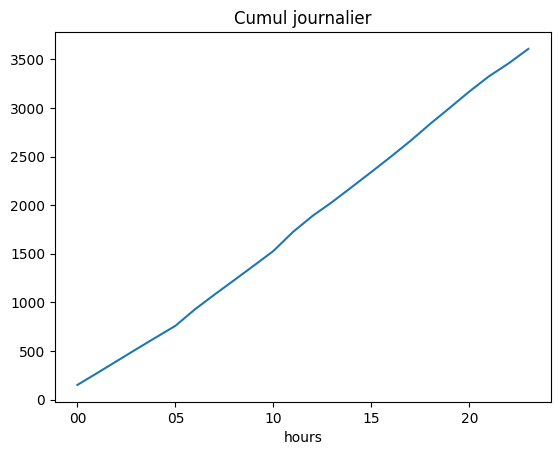

In [971]:
# progression sans surprise
grp_by_dayhours.loc['26/08/24']['cumsum'].plot()
plt.title('Cumul journalier')

Text(0.5, 1.0, 'Variation horaire')

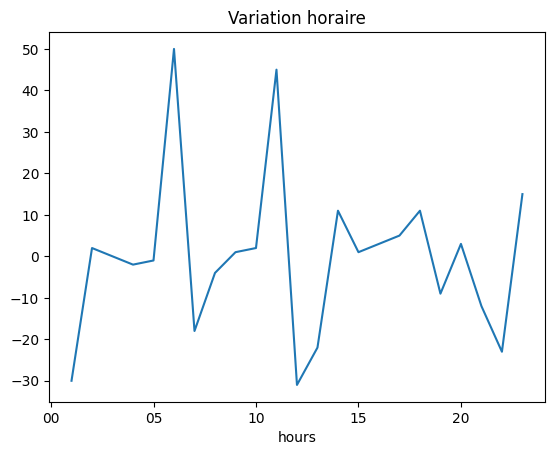

In [972]:
# plus parlant
grp_by_dayhours.loc['26/08/24']['diff'].plot()
plt.title(r'Variation horaire')

In [973]:
# count number of days since 21/08/2023
# https://stackoverflow.com/questions/45972388/count-my-multi-index-length-in-a-dataframe-pandas
n = len(grp_by_dayhours.index.levels[0].unique())
# or
n = len(grp_by_dayhours.index.levels[0])
# or
n = grp_by_dayhours.index.levshape[0]  # levshape -> (371,24)
n

454

In [974]:
df_grp.tail(n)['kWh'].describe()


count    454.000000
mean       3.482648
std        0.707069
min        0.849000
25%        3.339500
50%        3.613000
75%        3.878250
max        5.131000
Name: kWh, dtype: float64

In [975]:
maxday = df_grp.tail(n)['kWh'].idxmax()

Text(0.5, 1.0, '454 days')

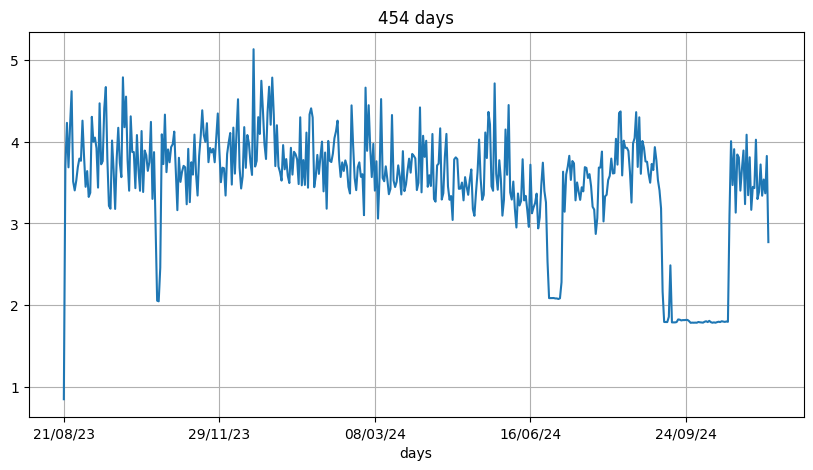

In [976]:
# show conso in span 
span = n
df_grp.tail(span)['kWh'].plot(figsize=(10, 5), layout='tight', grid=True)
plt.title(f'{span} days')

Text(0.5, 1.0, '100 days')

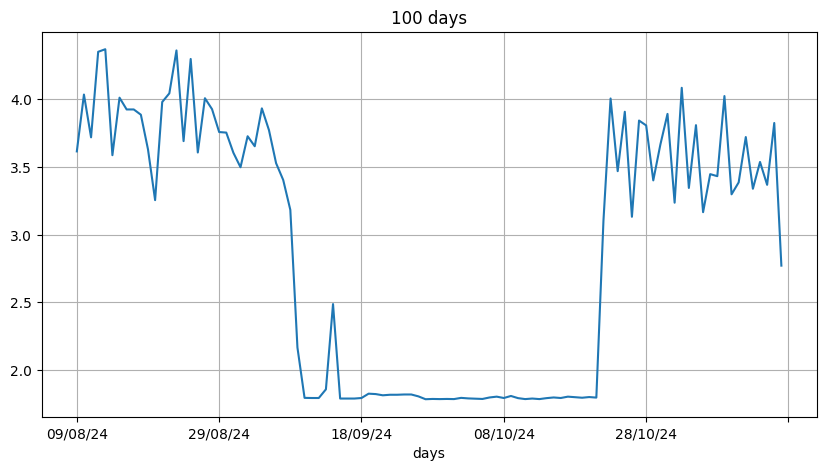

In [977]:
# show conso in span 
span = 100
df_grp.tail(span)['kWh'].plot(figsize=(10, 5), layout='tight', grid=True)
plt.title(f'{span} days')

In [978]:
df_grp['kWh']

days
21/08/23    0.849
22/08/23    3.700
23/08/23    4.230
24/08/23    3.686
25/08/23    4.191
            ...  
12/11/24    3.339
13/11/24    3.537
14/11/24    3.368
15/11/24    3.825
16/11/24    2.771
Name: kWh, Length: 454, dtype: float64

In [979]:
df_grp.describe()

,kWh
count,454.000000
mean,3.482648
std,0.707069
min,0.849000
25%,3.339500
50%,3.613000
75%,3.878250
max,5.131000


array([[<Axes: title={'center': 'kWh'}>]], dtype=object)

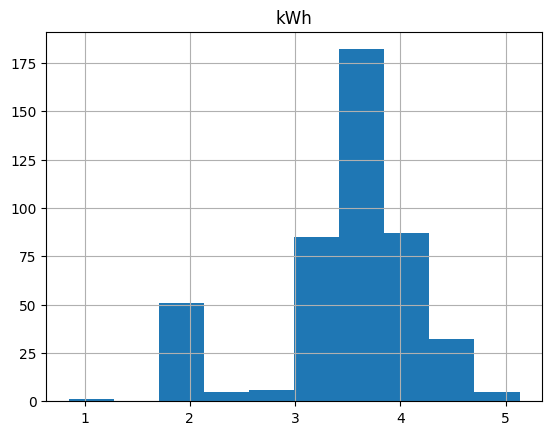

In [980]:
# 
df_grp.hist()

In [981]:
df_grp.tail(span)['kWh']

days
09/08/24    3.615
10/08/24    4.035
11/08/24    3.719
12/08/24    4.351
13/08/24    4.370
            ...  
12/11/24    3.339
13/11/24    3.537
14/11/24    3.368
15/11/24    3.825
16/11/24    2.771
Name: kWh, Length: 100, dtype: float64

# Conso par heure

In [982]:
day

'16/11/24'

In [983]:
grp_by_dayhours.loc[day]

,kWh,cumsum,diff
hours,,,
00,127,127,NaN
01,101,228,-26.0
02,105,333,4.0
03,106,439,1.0
04,107,546,1.0
05,102,648,-5.0
06,96,744,-6.0
07,105,849,9.0
08,186,1035,81.0


In [984]:
# select a day to plot
day = '02/07/24'
day = today
len(grp_by_dayhours.loc[day])


20

In [985]:
l = range(1,len(grp_by_dayhours.loc[day])+1)
l

range(1, 21)

In [986]:
grp_by_dayhours.loc[day,'days'] = l #ist(1,len(grp_by_day.loc[day])+1)

In [987]:
grp_by_dayhours.loc[day,'days'].values

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20.])

In [988]:
grp_by_dayhours.loc[day,'days']

hours
00     1.0
01     2.0
02     3.0
03     4.0
04     5.0
05     6.0
06     7.0
07     8.0
08     9.0
09    10.0
10    11.0
11    12.0
12    13.0
13    14.0
14    15.0
15    16.0
16    17.0
17    18.0
18    19.0
19    20.0
Name: days, dtype: float64

In [989]:
### ????????????????????????
grp_by_dayhours.loc[day,'days'] = grp_by_dayhours.loc[day,'days'].values.astype('int64')

In [990]:
grp_by_dayhours.loc[day].info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, 00 to 19
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   kWh     20 non-null     int64  
 1   cumsum  20 non-null     int64  
 2   diff    19 non-null     float64
 3   days    20 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 800.0+ bytes


In [991]:
grp_by_dayhours.loc[day,'days']

hours
00     1.0
01     2.0
02     3.0
03     4.0
04     5.0
05     6.0
06     7.0
07     8.0
08     9.0
09    10.0
10    11.0
11    12.0
12    13.0
13    14.0
14    15.0
15    16.0
16    17.0
17    18.0
18    19.0
19    20.0
Name: days, dtype: float64

In [992]:
day

'16/11/24'

In [993]:
grp_by_dayhours.loc[day]

,kWh,cumsum,diff,days
hours,,,,
00,127,127,NaN,1.0
01,101,228,-26.0,2.0
02,105,333,4.0,3.0
03,106,439,1.0,4.0
04,107,546,1.0,5.0
05,102,648,-5.0,6.0
06,96,744,-6.0,7.0
07,105,849,9.0,8.0
08,186,1035,81.0,9.0


Text(0.5, 1.0, '16/11/24')

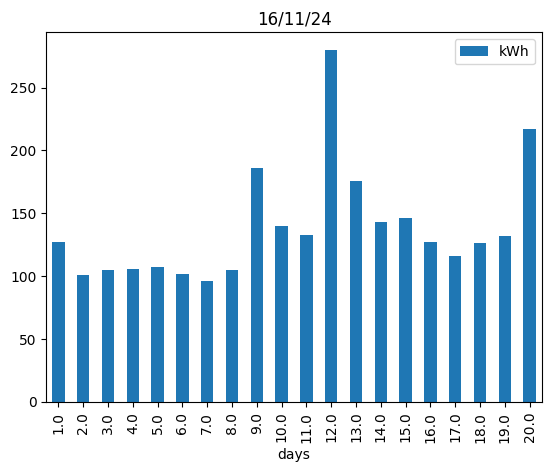

In [994]:
grp_by_dayhours.loc[day][['days','kWh']].plot.bar(x='days')
plt.title(f'{day}')

In [995]:
grp_by_dayhours.loc[day].index

Index(['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19'],
      dtype='object', name='hours')

# Conso du jour


In [996]:
groupedbyhour.count()

,kWh
hours,
00,127
01,101
02,105
03,106
04,107
05,102
06,96
07,105
08,186


In [997]:
day = '09/09/24'
day = maxday
#day = today
grp_by_dayhours.loc[day].kWh

hours
00    167
01    156
02    164
03    166
04    147
05    132
06    126
07    119
08    130
09    115
10    130
11    130
12    173
13    157
14    144
15    339
16    797
17    242
18    303
19    283
20    319
21    327
22    193
23    172
Name: kWh, dtype: int64

In [998]:
def conso_by_hour(day):
    global data
    # conso by hour
    #data = groupedbyhour.count().kWh
    data = grp_by_dayhours.loc[day].kWh

    # len(groupedbyhour)
    x = np.arange(1,len(data)+1)
    ymax = max(data)+5
    #groupedbyhour.count().plot(grid=True,xticks=x)
    fig, ax = plt.subplots(figsize=(8, 5), facecolor='darkcyan')

    plt.bar(x,data)
    #plt.grid()
    plt.tight_layout()
    plt.title(f'Conso by hour (W) {day} - Total {sum(data)}')
    plt.xlim(0,len(x)+1)
    #plt.xticks(rotation=30);
    #plt.ylim(0,ymax)

    rects = ax.patches

    # Make some labels.
    labels = [f"{i}" for i in data]
    fontfamily = {'calibri', 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width() / 2, height + 3, label, ha="center", va="bottom",
            fontfamily=fontfamily, fontsize=10, fontweight='bold', color='red'
        )


# 100 days

Text(0.5, 1.0, '100 days')

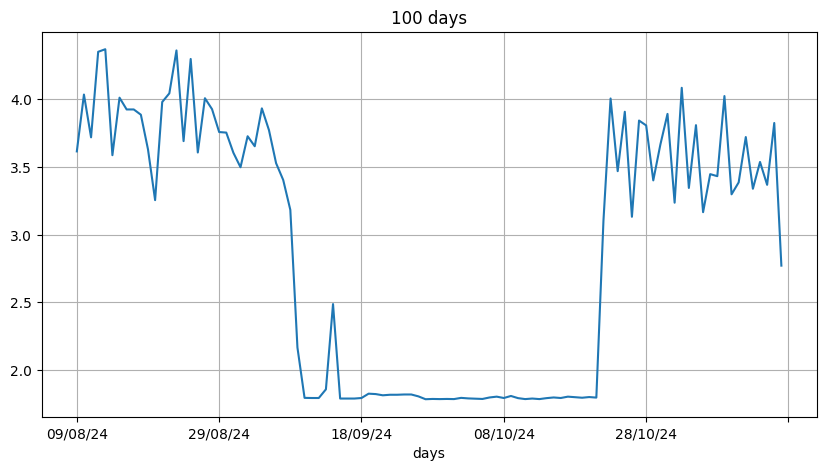

In [999]:
# show conso in span 
span = 100
df_grp.tail(span)['kWh'].plot(figsize=(10, 5), layout='tight', grid=True)
plt.title(f'{span} days')

In [1000]:
#import timeit
#start = timeit.timeit()
#print("hello")
end = time.time()
print(end - start)

88.16061854362488


# Today

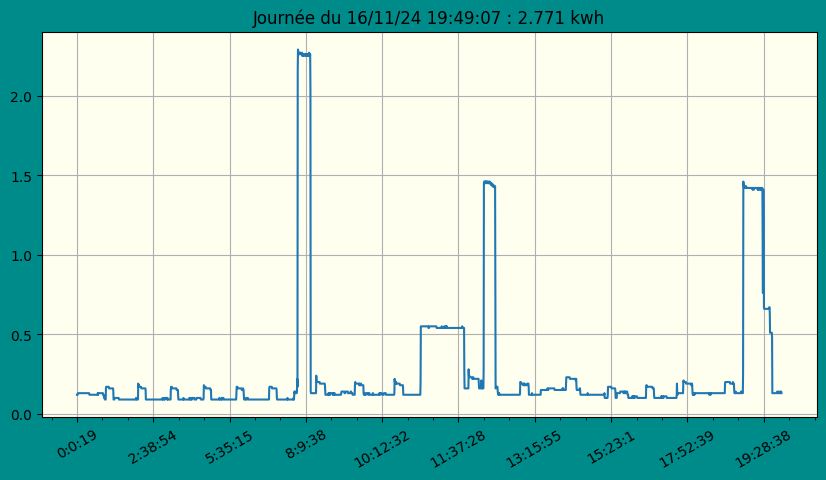

In [1001]:
show(today,bgcolor='ivory')

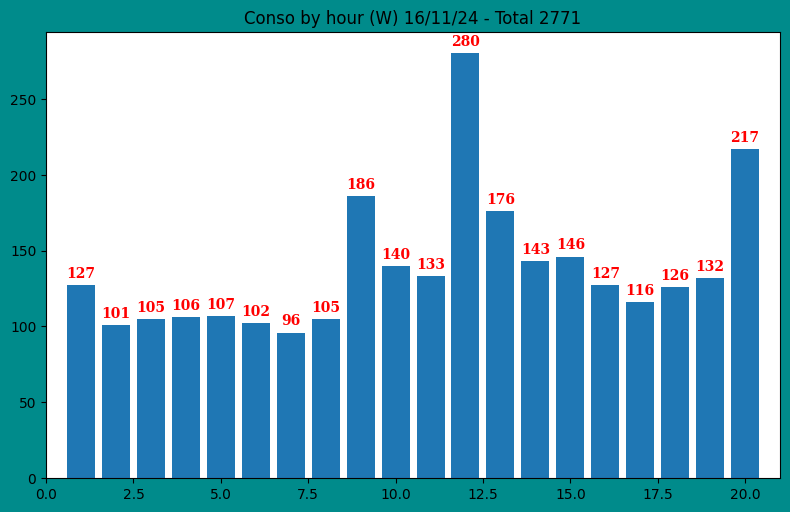

In [1002]:
conso_by_hour(today)

In [1003]:
day = '13/11/24'

('13/11/24', None)

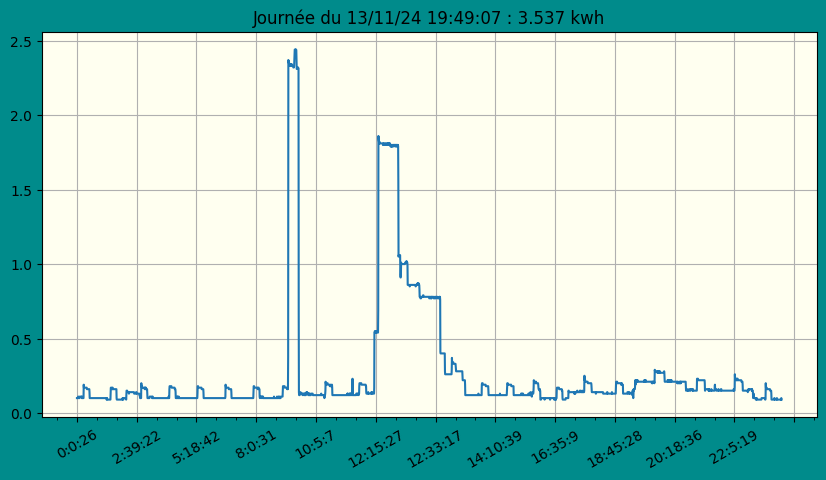

In [1004]:
day, show(day,bgcolor='ivory')

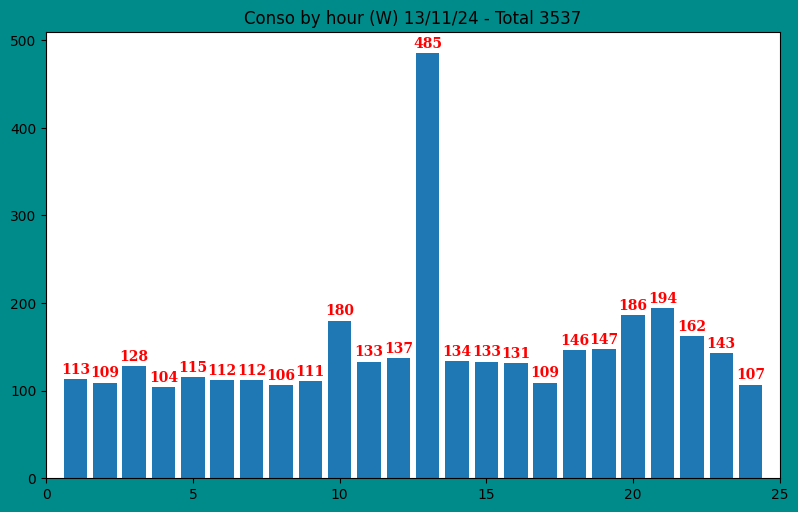

In [1005]:
conso_by_hour(day)

('21/12/23', None)

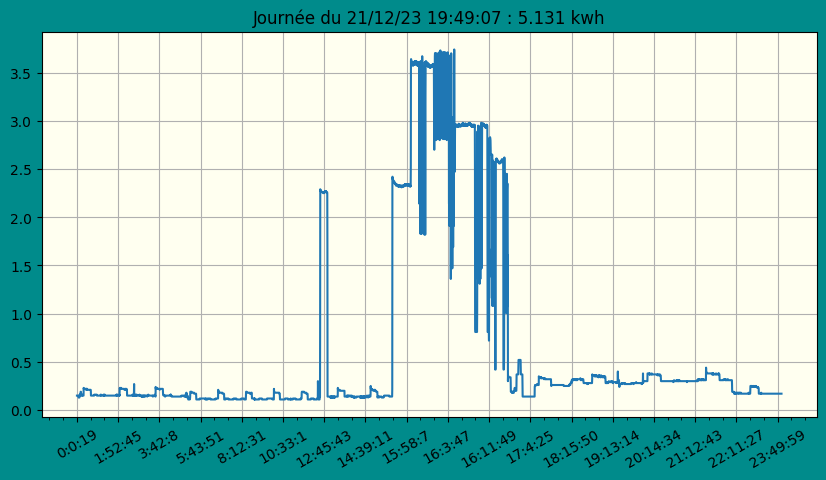

In [1006]:
# retour vietnam 22/10/2024
#day = '22/10/24'
day = maxday
day, show(day,bgcolor='ivory')

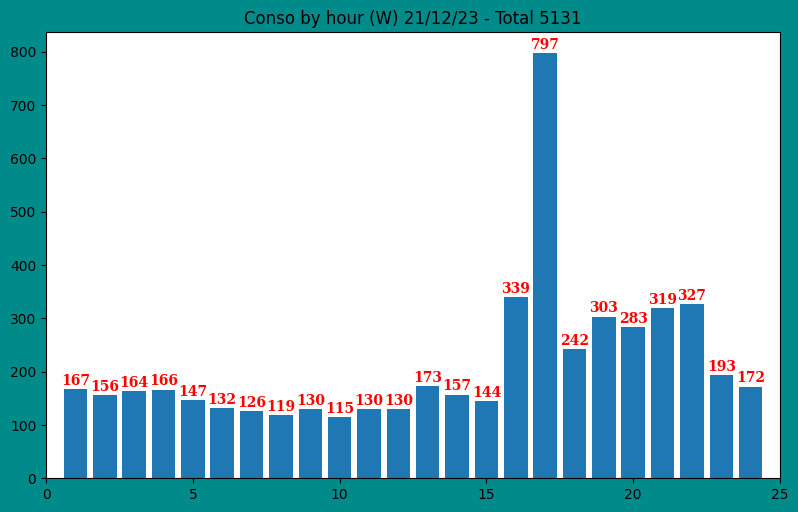

In [1007]:
conso_by_hour(day)

In [1008]:
sum(data)

5131

In [1009]:
diff = grp_by_dayhours.loc[today]
diff


,kWh,cumsum,diff,days
hours,,,,
00,127,127,NaN,1.0
01,101,228,-26.0,2.0
02,105,333,4.0,3.0
03,106,439,1.0,4.0
04,107,546,1.0,5.0
05,102,648,-5.0,6.0
06,96,744,-6.0,7.0
07,105,849,9.0,8.0
08,186,1035,81.0,9.0


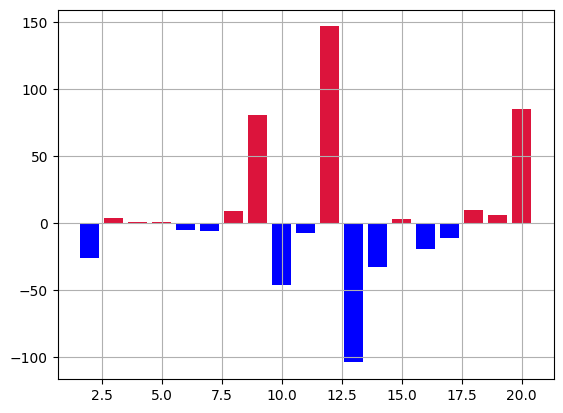

In [1010]:
x = np.arange(1,len(diff)+1)

plt.bar(x,diff['diff'], color=np.where(diff['diff'] > 0, 'crimson', 'blue'))
plt.grid()

In [1011]:
data

hours
00    167
01    156
02    164
03    166
04    147
05    132
06    126
07    119
08    130
09    115
10    130
11    130
12    173
13    157
14    144
15    339
16    797
17    242
18    303
19    283
20    319
21    327
22    193
23    172
Name: kWh, dtype: int64

<Axes: xlabel='hours'>

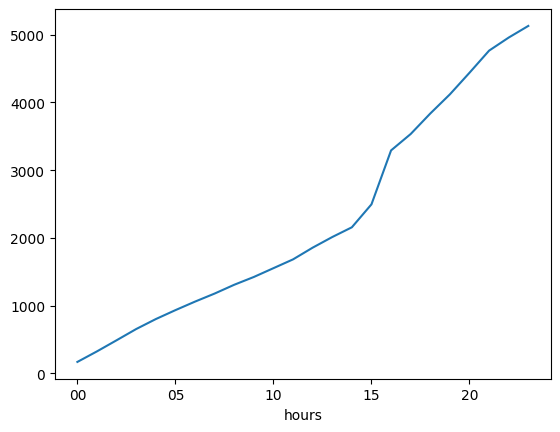

In [1012]:
data.cumsum().plot()


<Axes: xlabel='hours'>

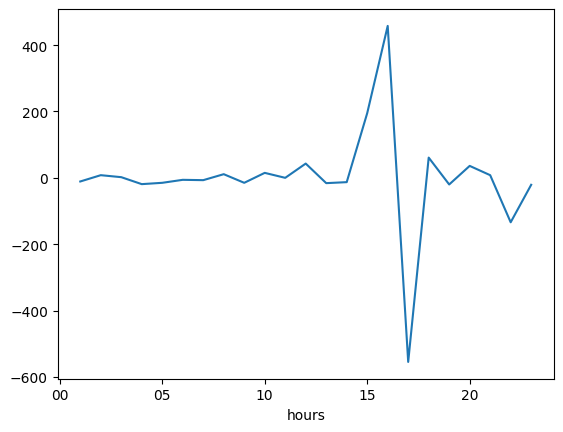

In [1013]:
# evolution par heure
data.diff().plot()

In [1014]:
data.diff().describe()

count     23.000000
mean       0.217391
std      162.843471
min     -555.000000
25%      -15.500000
50%       -6.000000
75%       13.000000
max      458.000000
Name: kWh, dtype: float64

<Axes: >

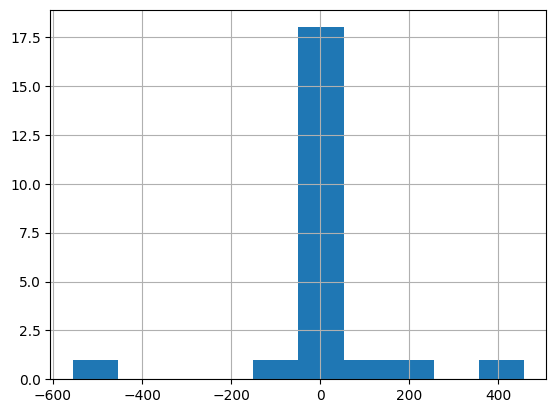

In [1015]:
data.diff().hist()

# Test sauvegarde

In [1016]:
import os
os.listdir(path='.')

['.git',
 '.gitignore',
 '.ipynb_checkpoints',
 '5_days_meteo.ipynb',
 '8days.csv',
 '8days.pkl',
 '8days_dump.json',
 '8days_to_json.json',
 'advanced_expression.ipynb',
 'alphabeta_tree.ipynb',
 'amlich.ipynb',
 'amlich5.ipynb',
 'amlich_data.py',
 'amlich_functions.py',
 'amlich_lib.py',
 'AntPath.ipynb',
 'Apple.csv',
 'astronomie_def.ipynb',
 'atom_electronic_configuration.ipynb',
 'bar_label.ipynb',
 'bell_curve.ipynb',
 'bitcoin_api.ipynb',
 'bitmap_convert.ipynb',
 'bitmap_structure.ipynb',
 'CAC40.csv',
 'chess_board.ipynb',
 'coindesk_api_client.ipynb',
 'collections.ipynb',
 'colormaps.ipynb',
 'conso.txt',
 'conso_by_hour.ipynb',
 'conso_data.csv',
 'conso_day_from_20230821.csv',
 'conso_jour.csv',
 'conso_jour.png',
 'conso_kwh.ipynb',
 'conso_kwh_reduced.ipynb',
 'conso_par_jour.csv',
 'covid19_france.ipynb',
 'cryptography_fernet.ipynb',
 'csv_readwrite.ipynb',
 'curves.ipynb',
 'dash_app001.ipynb',
 'data_correlation.ipynb',
 'data_temp16122022.csv',
 'dateformatter.ipy

In [1017]:
# list to store files
res = []
# Iterate directory
for file in os.listdir('.'):
    # check only text files
    if file.endswith('.csv'):
        res.append(file)
        print(file)
#print(res)

8days.csv
Apple.csv
CAC40.csv
conso_data.csv
conso_day_from_20230821.csv
conso_jour.csv
conso_par_jour.csv
data_temp16122022.csv
demain.csv
df.csv
df_grp.csv
DowJones.csv
EURUSD.csv
Ford.csv
karaoke.csv
ligue1_2020_27.csv
Nasdaq.csv
Nikkei.csv
planete.csv
saturn_bodies.csv
saturn_rings.csv
SMSSpamCollection.csv
table-indicateurs-open-data-dep-2023-06-30-17h59.csv
table-indicateurs-open-data-france-2023-06-30-17h59.csv
temp_humidity.csv
Tesla.csv
titanic.csv
Toyota.csv
VNDUSD.csv
WA_Fn-UseC_-Telco-Customer-Churn.csv
week.csv


In [1018]:
#conso_byhour(day)

In [1019]:
# save to file
import pickle
path = r'../consobyhour.pkl'
with open(path,'wb') as file:
    pickle.dump(data, file)

# plot any day


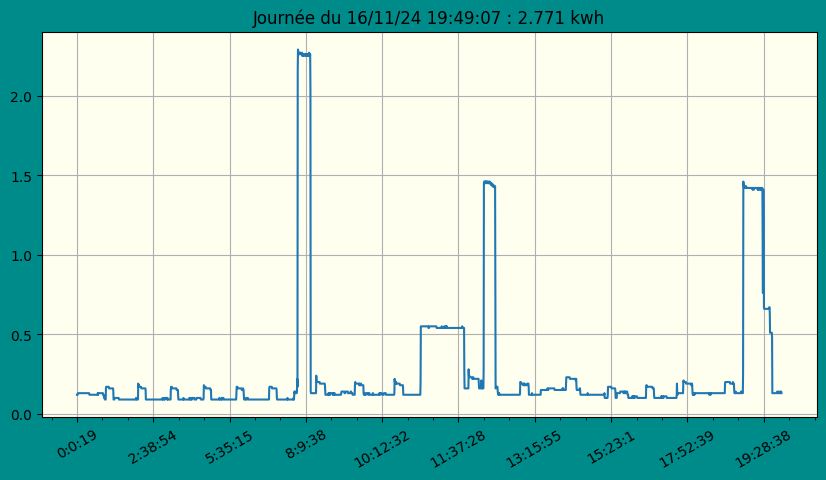

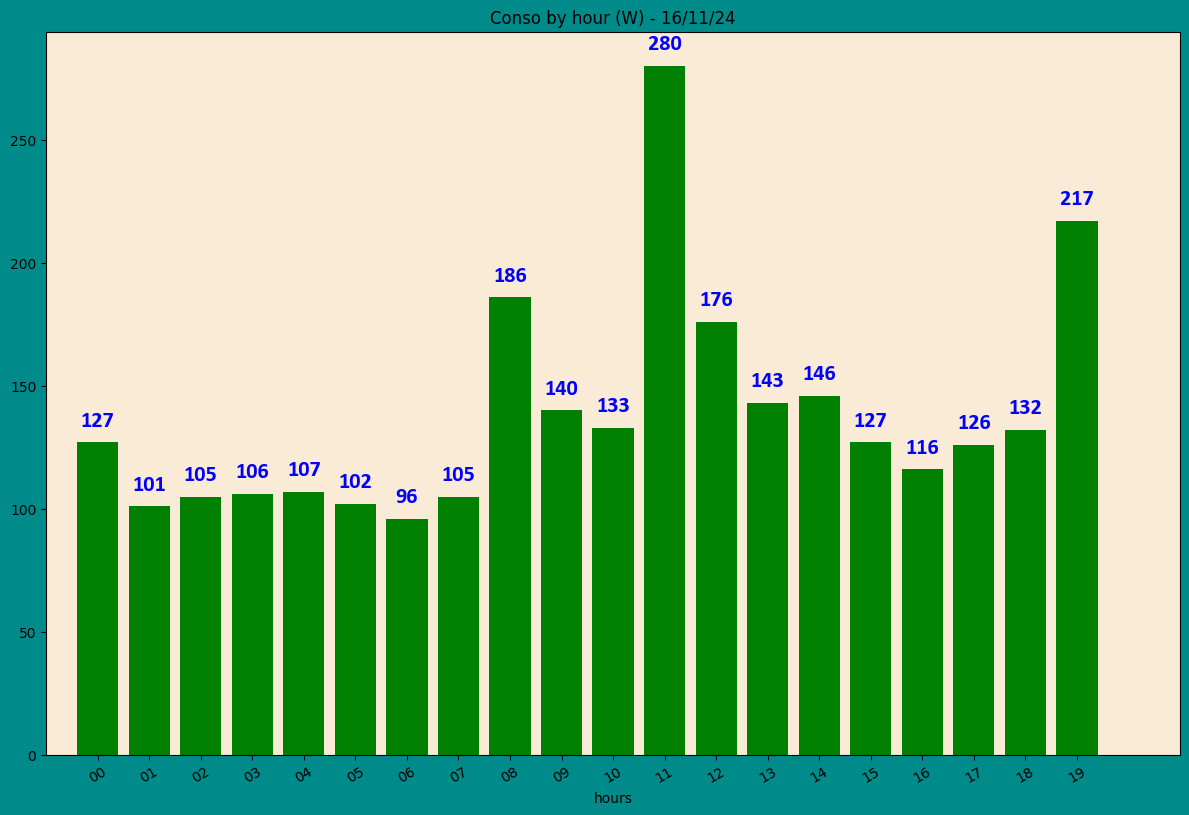

In [1020]:
day = '27/10/24'
day = today
show(day,pltcolor='darkcyan')
conso_byhour(day)

In [1021]:
month.describe()


count    30.000000
mean      3.274600
std       0.725094
min       1.795000
25%       3.183500
50%       3.416500
75%       3.808500
max       4.085000
Name: kWh, dtype: float64

<Axes: >

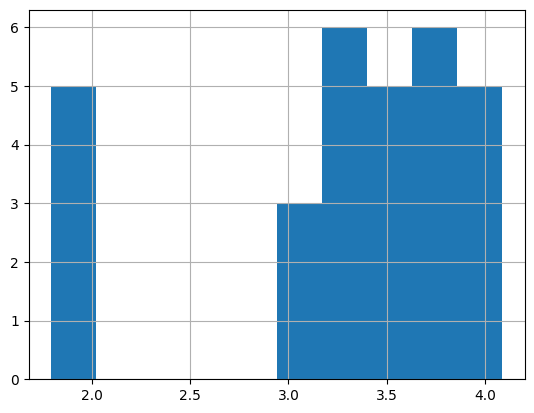

In [1022]:
month.hist()

<Axes: xlabel='days'>

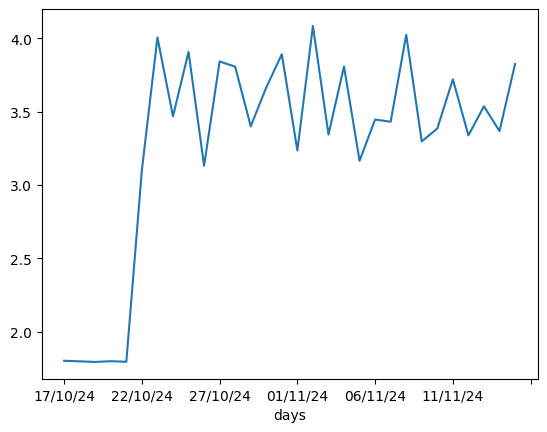

In [1023]:
month.plot()

In [1024]:
# date with max conso in 1 month
month.idxmax()

'02/11/24'

In [1025]:
# plot month day max conso (télévision de 11h à 23h)
day = month.idxmax()
#day = '27/10/2024'
day

'02/11/24'

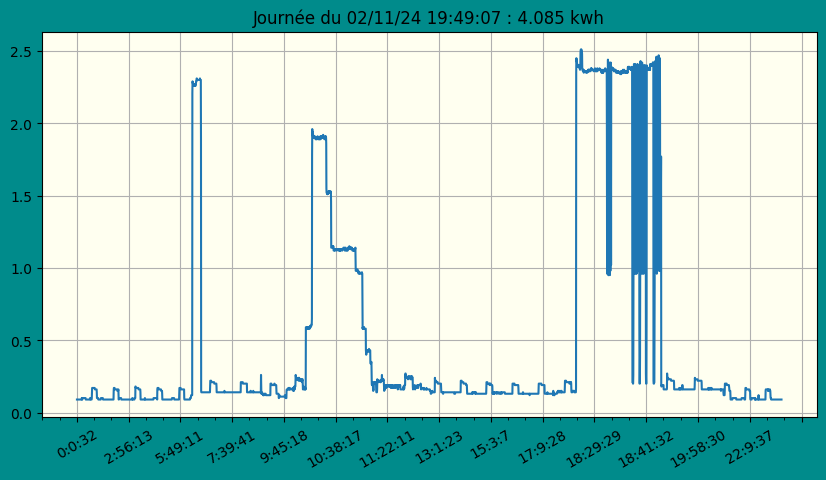

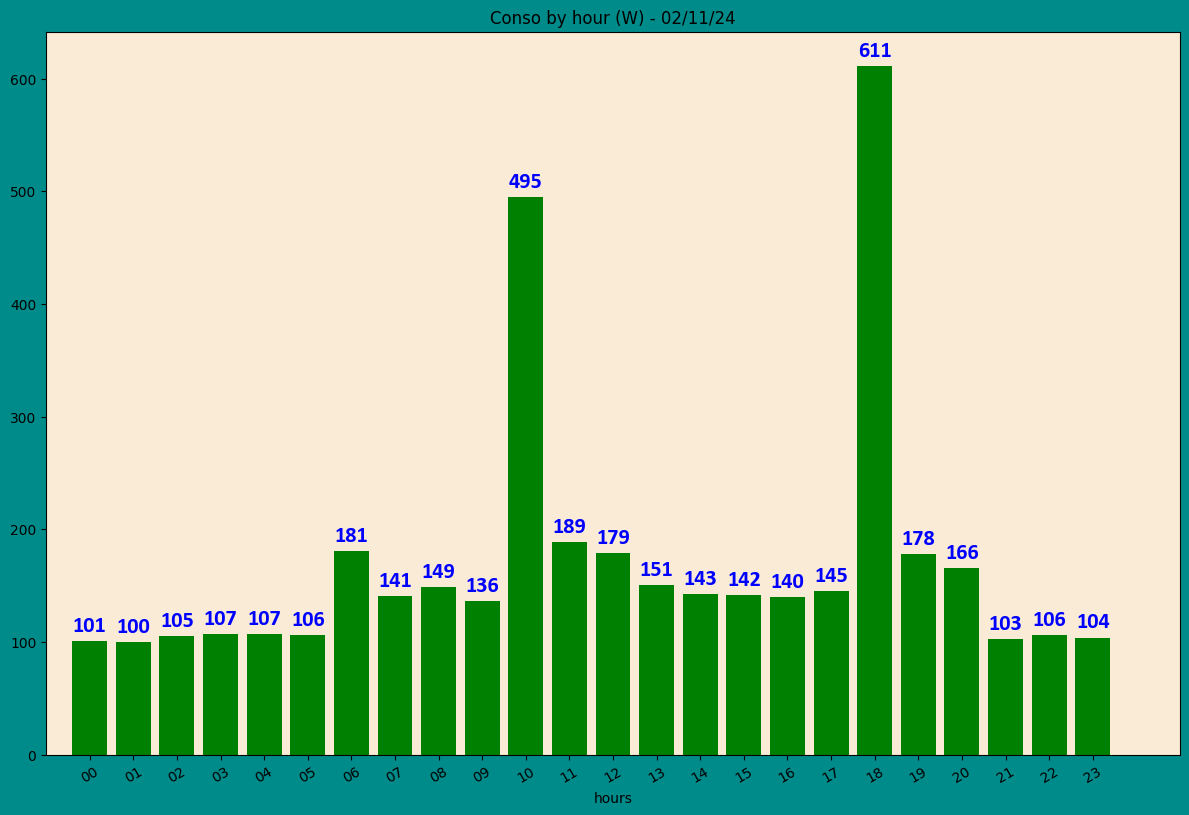

In [1026]:
show(day,pltcolor='darkcyan')
conso_byhour(day)

In [1027]:
grp_by_dayhours

kWh  cumsum   diff  days
days     hours                          
21/08/23 18       4       4    NaN   NaN
         19     173     177  169.0   NaN
         20     281     458  108.0   NaN
         21     130     588 -151.0   NaN
         22     130     718    0.0   NaN
...             ...     ...    ...   ...
16/11/24 15     127    2180  -19.0  16.0
         16     116    2296  -11.0  17.0
         17     126    2422   10.0  18.0
         18     132    2554    6.0  19.0
         19     217    2771   85.0  20.0

[10874 rows x 4 columns]

In [1028]:
grp_by_dayhours.loc[month.idxmax()]

,kWh,cumsum,diff,days
hours,,,,
00,101,101,NaN,NaN
01,100,201,-1.0,NaN
02,105,306,5.0,NaN
03,107,413,2.0,NaN
04,107,520,0.0,NaN
05,106,626,-1.0,NaN
06,181,807,75.0,NaN
07,141,948,-40.0,NaN
08,149,1097,8.0,NaN


In [1029]:
grp_by_dayhours.columns

Index(['kWh', 'cumsum', 'diff', 'days'], dtype='object')

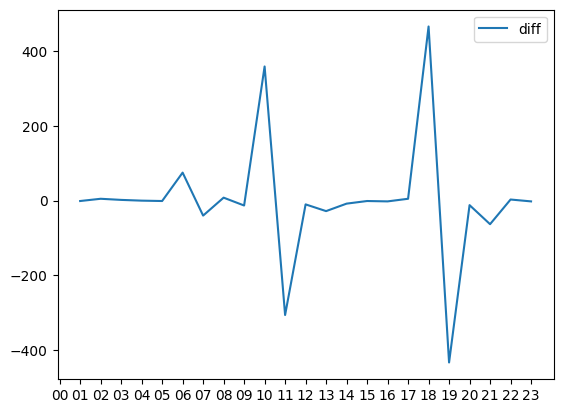

In [1030]:
# diff
plt.plot(grp_by_dayhours.loc[month.idxmax()]['diff'],label=grp_by_dayhours.columns[2])
plt.legend()

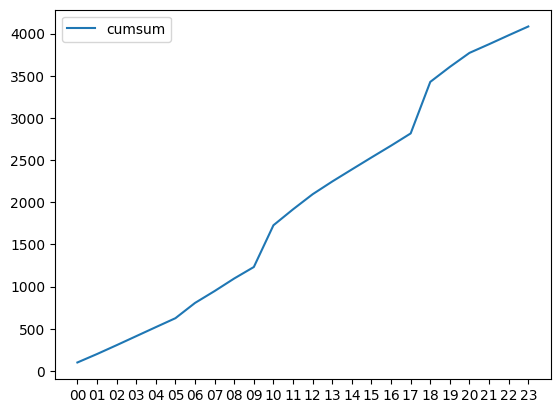

In [1031]:
# cumsum
plt.plot(grp_by_dayhours.loc[month.idxmax()]['cumsum'],label=grp_by_dayhours.columns[1])
plt.legend()

In [1032]:
# 41 s
# file to big to git sync

# create .gitignore
filename=r'../conso_data.csv'
#conso_data.to_csv(filename)
#43.6s size 140128 kB